Ch3 p72

How do the maximum and minimum values of the slopes of the three curves of p71 compares to the true slope of 3? What does this mean with respect to getting the slope of experimental data?

In [66]:
import numpy as np
from naf.incf import least_squares_polynomial, eval_poly
import matplotlib.pyplot as plt
from sympy import *
from naf.nonlin import mrsv

np.set_printoptions(precision=3,threshold=3,suppress=True)

In [67]:
x = np.array([1,2,3,4,5,6])
y = np.array([5.04,8.12,10.64,13.18,16.20,20.04])

pts = np.column_stack((x,y))

In [68]:
ap1 = least_squares_polynomial(pts,1)

print(ap1)

[2.025 2.908]


The slope of the linear model does not change along its length therefore the maximum and minimum slope is the same, namely, m = 2.908 which compares well with the actual slope of 3.0.

In [69]:
ap2 = least_squares_polynomial(pts,2)

print(ap2)

[2.992 2.183 0.104]


In [81]:
z = symbols('z')
f = ap2[2]*z**2 + ap2[1]*z + ap2[0]
print(f)
fp = diff(f,z)
print(fp)

0.103571428571419*z**2 + 2.18300000000007*z + 2.9919999999999
0.207142857142837*z + 2.18300000000007


To find the minimum and maximum slopes of the quadratic the derivative is taken. The derivate is a linear function with a positive slope. Therefore. the local minimum of this function is the minmum slope and local maximum is the maximum slope. 

Substituting in x=1 and x=6 will give the minimum and maximum slopes in the interval.

In [82]:
min_m = fp.subs(x,1)
print(min_m)
max_m = fp.subs(x,6)
print(max_m)

2.39014285714291
3.42585714285710


The minimum slope on the interval is 2.39 and the maximum slope is 3.42. These slopes are in substantial error when compared to the actual slope of 3.0.

In [83]:
ap5 = least_squares_polynomial(pts, 5)
print(ap5)

z = symbols('z')
f = ap5[5]*z**5 + ap5[4]*z**4 + ap5[3]*z**3 + ap5[2]*z**2 + ap5[1]*z + ap5[0]
print(f)
fp = diff(f,z)
print(fp)
fpp = diff(fp,z)
print(fpp)

[ 0.7    5.233 -1.035  0.147 -0.005  0.   ]
1.52191765911285e-13*z**5 - 0.00500000000288808*z**4 + 0.146666666687313*z**3 - 1.03500000006827*z**2 + 5.23333333343494*z + 0.699999999947905
7.60958829556423e-13*z**4 - 0.0200000000115523*z**3 + 0.440000000061938*z**2 - 2.07000000013654*z + 5.23333333343494
3.04383531822569e-12*z**3 - 0.0600000000346569*z**2 + 0.880000000123876*z - 2.07000000013654


In [105]:
fpp_poly = fpp.as_poly()
coeffs = np.flip(np.array(fpp_poly.all_coeffs()))
x1 = np.array([2,10,1000])
roots = mrsv(coeffs,x1)
print(roots)

[2.943e+00 1.172e+01 1.971e+10]


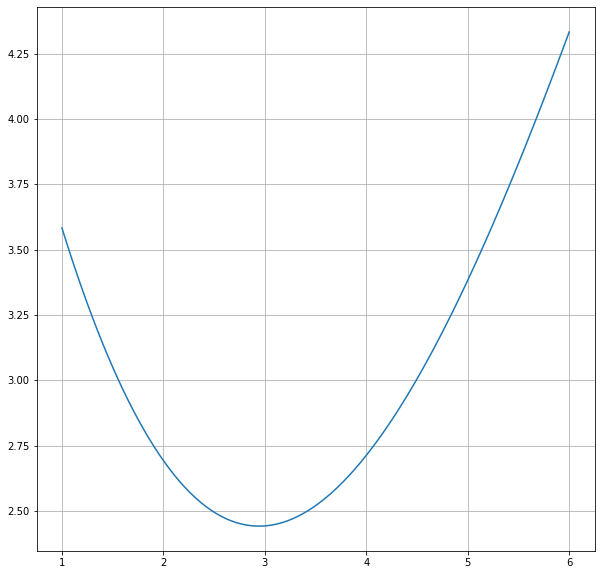

In [107]:
eq = lambdify(z, fp, 'numpy')
x = np.linspace(1,6,100)
y2 = eq(x)

fig, ax = plt.subplots(figsize=(10,10))
ax.grid()
ax.plot(x,y2)
plt.show()

From the roots of the second derivative of the 5th degree polynomial a zero is found in the interval [1,6]. This is a good place to start looking for a minimum or maximum slope based on Fermat's Theorem. The other place to investigate is the end points of the interval. 

In [116]:
critical_pt = fp.subs(z, roots[0])
start_pt = fp.subs(z, 1)
end_pt = fp.subs(z,6)

min_m = min(critical_pt, start_pt, end_pt)
max_m = max(critical_pt, start_pt, end_pt)

print(min_m)
print(max_m)

2.44247175133598
4.33333333333638


The minimum slope is 2.4424 and the maximum slope is 4.3333. These slopes are in substantial error when compared the actual slope of 3.0, especially when considering the maximum slope of 4.3333. 